<a href="https://colab.research.google.com/github/ProfAndersonVanin/analise_sentimentos_app/blob/main/Analise_de_Sentimentos_de_um_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analisando Sentimento em notas de app (Python)**

# PARTE 01

## Coletando os dados

O primeiro passo é instalar o scraper que vamos usar, chamado google-play-scraper.

In [1]:
!pip install google-play-scraper

     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.0.3-py3-none-any.whl size=24394 sha256=038a9b559539120cccda528a86732502946c3a9aa8b45ae60fcf918877ff0ab1
  Stored in directory: /root/.cache/pip/wheels/81/37/0b/4a14be55b449a048cd93d79930b1a980dee7896480defa1923
Successfully built google-play-scraper


In [2]:
#Importando o comando app da library google-play-scraper
from google_play_scraper import app

Agora precisamos do **"nome"** do app que queremos analisar:

No caso será o 'com.rappi.storekeeper', também conhecido como **Rappi** para Entregador.

- Onde você achou esse "nome" para o app?

Passo 1: Entre na Google Play Store

Passo 2: Busque o App que você quer analisar

Passo 3: Veja qual a url do app.

No meu caso, ficou assim:

https://play.google.com/store/apps/details?id=com.rappi.storekeeper

O nome depois do *id=* é o nome que você precisa usar no scraper.

In [3]:
result = app('com.rappi.storekeeper', lang = 'pt', country = 'br')
result

{'adSupported': None,
 'androidVersion': '5.0',
 'androidVersionText': '5.0 ou superior',
 'appId': 'com.rappi.storekeeper',
 'comments': ['App e bom tem boas taxas de entregas. O problema é quando você precisa do suporte, a solução que eles dão para todo problema é uma divida e um bloqueio. Não sei o que acontece com o meu app depois que reclamei do suporte ele vive dando erro de sistema parece algo incrível, ou será alguma restrição no sistema deles como alguma forma de punição também. Já limpei cache desinstalei e reinstalei várias vezes e nada. Rappi me ajuda a te ajudar ficar mais rica.',
  'Uma critica construtiva. Não estou cuspindo no prato que como. Mas este app tem problemas. 1° É lentissímo. As vezes leva mais de 30 segundos pra abrir uma opção. 2° Tem um bug muito irritante, que faz o pedido desaparecer da tela induzindo a acreditar que foi cancelado. As vezes volta depois de reiniciado em rede wi-fi 3° as vezes ele trava na tela de desbloqueio do aparelho. Nesse caso a úni

## Baixar todas as reviews

O código leva uns 5 minutos para gerar o resultado.

Então é uma boa hora para levantar e tomar um café.

In [4]:
#Baixando todos os reviews do app.
from google_play_scraper import Sort, reviews_all

#Comando para todas as reviews
Reviews = reviews_all('com.rappi.storekeeper', lang='pt', country='br', sort=Sort.MOST_RELEVANT, sleep_milliseconds=0)

## Criando todos os reviews em um DataFrame

In [5]:
#Importando pandas.
import pandas as pd

#Transformando os dados em um DataFrame para trabalharmos as análises.
Reviews_Rappi = pd.DataFrame(Reviews)

#Verificando a serie de dados.
Reviews_Rappi

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGRnrcBZQ1OHEqVsEAU1IVgfdX3L_Lha8GO9hg...,João Berto Lima Varjão,https://play-lh.googleusercontent.com/a-/AOh14...,App e bom tem boas taxas de entregas. O proble...,1,216,7.35.1,2022-03-29 14:34:11,None,NaT
1,gp:AOqpTOGSj6CpVi4hG4W7M87qG7V--AVBUjchNLGOh4t...,Yumemi Yumemite Anti-Pandeminion,https://play-lh.googleusercontent.com/a-/AOh14...,Uma critica construtiva. Não estou cuspindo no...,2,275,7.34.1,2022-03-18 13:05:46,None,NaT
2,gp:AOqpTOGtEys8Xt5Ej_va6I-zalLmFygQlFgfYv8nGKE...,alan barbosa costa,https://play-lh.googleusercontent.com/a-/AOh14...,É o único aplicativo que te aprova rapidamente...,2,44,7.19.0,2021-11-26 22:28:48,None,NaT
3,gp:AOqpTOHXVPtAEdsocHW7WpoOo5LCse4sPvl8ubaqCRK...,Sávio Mendes,https://play-lh.googleusercontent.com/a-/AOh14...,"O aplicativo está cada vez pior, colocando met...",1,20,7.19.0,2022-03-05 13:28:23,None,NaT
4,gp:AOqpTOFOaiGBneMt4ms84gbLRp2vbNeBhbauXViXbv8...,Lucas Allifrancis,https://play-lh.googleusercontent.com/a-/AOh14...,Muitos requisitos e exigências que impedem de ...,1,63,7.20.1,2021-11-23 02:49:45,None,NaT
...,...,...,...,...,...,...,...,...,...,...
65450,gp:AOqpTOEoMAY9sYQAoJftH0G5MbiAoFe4I6qnFahg3c8...,e sim sua essência.,https://play-lh.googleusercontent.com/a-/AOh14...,💪🏿,5,0,None,2020-07-25 19:47:28,None,NaT
65451,gp:AOqpTOH4ErPduqqDXJk1Z8G9p7uvPK1albu5O3phUdx...,Ronny Knopp,https://play-lh.googleusercontent.com/a/AATXAJ...,L👍🤑🙏,5,0,None,2021-02-10 01:16:45,None,NaT
65452,gp:AOqpTOFIeEN4bSRvZdgXGyiWyk3g54sS5cq2s6lJdr-...,Anderson Silva,https://play-lh.googleusercontent.com/a/AATXAJ...,🥵❤🙏,5,0,None,2021-01-30 15:30:02,None,NaT
65453,gp:AOqpTOFM7EiskphZcw2ZZMTrJFUucCcu5MDZ03z8lPU...,Gleibson Martins,https://play-lh.googleusercontent.com/a/AATXAJ...,😉👏💯,5,0,None,2020-11-19 23:05:15,None,NaT


## Criando a tokenização das palavras e normalizando as palavras

Essa é uma das primeira etapas para o Processamento de Linguagem Natural. O que vamos fazer aqui é "fazer o Python entender" o que é uma palavra, ou seja, uma lista de símbolos (letras) que juntas criam um sentido.

In [6]:
#Importando o nltk e salvando os corpus necessários

import nltk
nltk.download('wordnet')
nltk.download('punkt')

#Aplicando uma função para tokenizar por palavra
Reviews_Rappi['content'] = Reviews_Rappi.apply(lambda row: nltk.word_tokenize(row['content']), axis=1) # Tokenização dos dados

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Normalizar as palavras para que tenhamos menos "sujeira" disponível.

1. Remover palavras conectoras, as stopwords (conjunções, verbos de ligação, etc), para deixar nosso DataSet mais limpinho;
2. Deixar todo o texto em caixa baixa, ou *lowercase* (sem maiúsculas) para não termos a mesma palavra em duas grafias;
3. Remover a pontuação, pelos mesmos motivos.

Vamos usar uma lista pré carregada de stopwords (as tais palavras conectoras):

In [7]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
language = 'portuguese'

#Criando a lista de stopwords
stopwords = stopwords.words(language)
stopwords = list(set(stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Agora, vamos criar uma função para cada um dos pontos 1, 2 e 3 citados acima.

## Ponto 1: Stopwords

In [8]:
def remove_stopwords(words):
    """Remover as Stopwords das palavras tokenizadas"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

## Ponto 2: lowercase

In [9]:
def to_lowercase(words):
    """converter todos os caracteres para lowercase"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

## Ponto 3: remover pontuação

In [11]:
def remove_punctuation(words):
    """remover pontuação"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

Agora juntar tudo numa função para normalizar as palavras, ou seja, rodar todas as funções acima em uma.

In [12]:
def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    
    return ' '.join(words)

E agora aplicar aos reviews:

In [13]:
Reviews_Rappi['content'] = Reviews_Rappi.apply(lambda row: normalize(row['content']), axis=1)

## Importando o SentiLex-PT02

O SentiLex-PT02 é um dicionário de sentimentos.Sim, é nada mais que um arquivo em texto que possui a palavra e indica o sentimento, tipo:

Bom: palavra positiva, então +1

Ruim: Palavra negativa, então -1

Normal: Palavra neutra, então 0

In [14]:
#Importando o Léxico de Palavras com polaridades
sentilexpt = open('SentiLex-lem-PT02.txt')

#Criando um dicionário de palavras com a respectiva polaridade.
dic_palavra_polaridade = {}
for i in sentilexpt.readlines():
  pos_ponto = i.find('.')
  palavra = (i[:pos_ponto])
  pol_pos = i.find('POL')
  polaridade = (i[pol_pos+7:pol_pos+9]).replace(';', '')
  dic_palavra_polaridade[palavra] = polaridade


#Verificando o dicionário
dic_palavra_polaridade

{'à-vontade': '1',
 'abafado': '-1',
 'abafante': '-1',
 'abaixado': '-1',
 'abalado': '-1',
 'abalizado': '1',
 'abalroado': '-1',
 'abalroar': '1',
 'abanar': '1',
 'abandalhado': '-1',
 'abandalhamento': '-1',
 'abandonado': '-1',
 'abandonar': '-1',
 'abarcante': '0',
 'abarrotado': '-1',
 'abastado': '1',
 'abastecido': '0',
 'abater': '1',
 'abatido': '-1',
 'abelhudo': '-1',
 'abençoado': '1',
 'aberração': '-1',
 'aberrante': '-1',
 'aberrativo': '-1',
 'aberto': '1',
 'abespinhado': '-1',
 'abestalhado': '-1',
 'abilolado': '-1',
 'abjeção': '-1',
 'abjecção': '-1',
 'abjecto': '-1',
 'abjeto': '-1',
 'abnegado': '1',
 'abobado': '-1',
 'abobalhado': '-1',
 'abolicionista': '0',
 'abolido': '-1',
 'abominador': '-1',
 'abominando': '-1',
 'abominar': '0',
 'abominável': '-1',
 'abonado': '1',
 'abonatório': '1',
 'abonecado': '0',
 'aborrecer-se': '-1',
 'aborrecer': '1',
 'aborrecido': '-1',
 'abortado': '-1',
 'abraçado': '1',
 'abrasileirado': '0',
 'abrigado': '0',
 'abril

Agora vamos criar uma função para aplicar o SentiLex nos reviews e colocar o score numa nova coluna:

In [15]:
#Criando uma função chamada "Score de Sentimento" para determinar os #sentimentos associados
def Score_sentimento(frase):
    frase = frase.lower()
    l_sentimento = []
    for p in frase.split():
        l_sentimento.append(int(dic_palavra_polaridade.get(p, 0)))
    score = sum(l_sentimento)
    if score > 0:
        return 'Pos {} '.format(score)
    elif score == 0:
        return 'Neu {} '.format(score)
    else:
        
        return 'Neg {}'.format(score)

**"Leia a frase, calcule a soma de palavras e diga se o final é positivo ou negativo".**

Coisas por exemplo: Bom, mas pode melhorar, deve sair neutro. (+1-1 = 0).

In [16]:
#Criando uma função para aplicar um score de sentimento para cada um dos comentários, a partir das palavras positivas e negativas.
Reviews_Rappi['sentimento'] = Reviews_Rappi.apply(lambda row: Score_sentimento(row['content']), axis=1)

Depois que montei essa função, percebi que ficaria melhor se eu colocasse o score numérico separado das Palavras POS, NEU e NEG.

In [17]:
#Reorganizando o resultado em colunas para posteriormente lançar no modelo
Reviews_Rappi['Score_Sentimento'] = Reviews_Rappi['sentimento'].str.slice(-2)
Reviews_Rappi['Score_Sentimento'] =Reviews_Rappi['Score_Sentimento'].astype(int)
Reviews_Rappi['Sent'] = Reviews_Rappi['sentimento'].str.slice(0,-3)


In [18]:
#Verificando como ficou a distribuição de comentários a partir do Score de Sentimento Criado.
Reviews_Rappi.groupby('Score_Sentimento').count()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sentimento,Sent
Score_Sentimento,,,,,,,,,,,,
-9,1,1,1,1,1,1,1,1,0,0,1,1
-8,10,10,10,10,10,10,10,10,0,0,10,10
-7,21,21,21,21,21,21,19,21,0,0,21,21
-6,54,54,54,54,54,54,49,54,0,0,54,54
-5,134,134,134,134,134,134,118,134,0,0,134,134
-4,364,364,364,364,364,364,330,364,0,0,364,364
-3,860,860,860,860,860,860,743,860,0,0,860,860
-2,2414,2414,2414,2414,2414,2414,2106,2414,6,6,2414,2414
-1,7121,7121,7121,7121,7121,7121,6213,7121,18,18,7121,7121


## Wordclouds.

In [19]:
#criando um objeto somente com os comentários
content = Reviews_Rappi['content']

In [20]:
#juntando todos eles para construir a wordcloud - ela tem que estar todo contido numa string
all_content = "".join(c for c in content)

In [21]:
#importando as libraries necessárias para o wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

#montando um novo dicionário de stopwords
stopwords = set(STOPWORDS)

In [22]:
#Após review das palavras, adicionando alguns termos "sujeira" encontrados nas nuvens
stopwords.update(["pra", "app", "aplicativo", "vc", "pra", "to", "os", "rappi", "vcs", "nao", "pq", "mim", "ai", "ta", "ja", "ter", "fazer", "lá", "deu", "dado", "então", "vou", "vai", "veze", "ficar", "tá", "apena"])


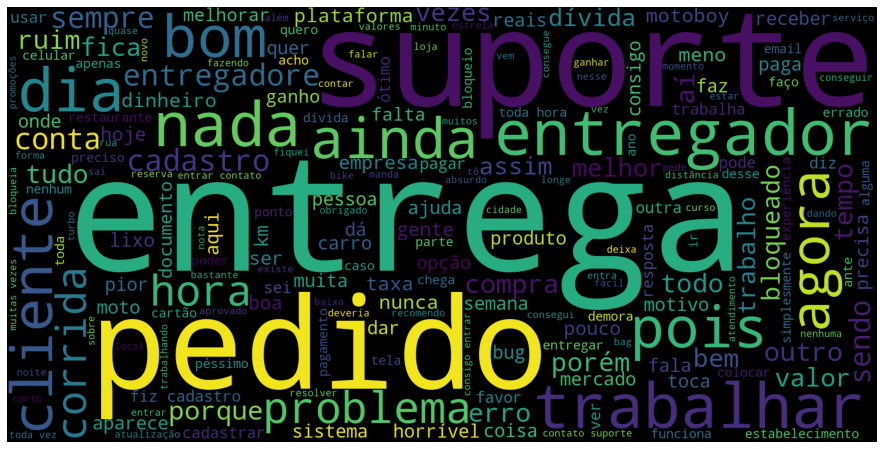

In [24]:
#Criando o objeto wordcloud com as configs necessárias. Cor escolhida = preta, origem dos dados = all_content
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      
                      height=800).generate(all_content)


#configurando forma de apresentação do gráfico e apresentando no notebook.
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

# PARTE 02

## Criar as Wordclouds por tipo de sentimento

Vamos dividir assim:

- Se o usuário deu notas 1 e 2, o sentimento é negativo.
- Se o usuário deu nota 3, o sentimento é neutro.
- Se o usuário deu nota 4 e 5, o sentimento é positivo.

Isso é um textbook da chamada *Escala de Likert*, que é a famosa escala de notas 1 a 5.

## Remover tudo que não nos interessa, id de usuário, nome, link para avatar de usuário

In [25]:
#Criando agora um Dataset apenas com o que vamos usar no modelo. Não preciso incluir nenhum detalhe sobre quem deu o review.
Rappi = Reviews_Rappi[['content', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'score',  'Score_Sentimento', 'Sent']]

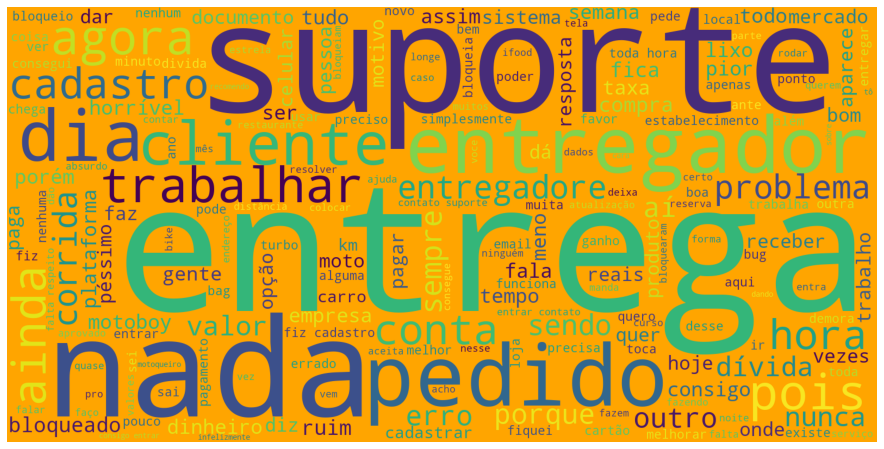

In [26]:
#Realizando o mesmo processo, porém agora para avaliações negativas - notas 1 e 2
Negative = Rappi[Rappi.score < 3]
Neg_Content = Negative['content']
all_neg_content = "".join(c for c in Neg_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='orange', width=1600,                            
                      height=800).generate(all_neg_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

E agora, temos um plot das avaliações negativas

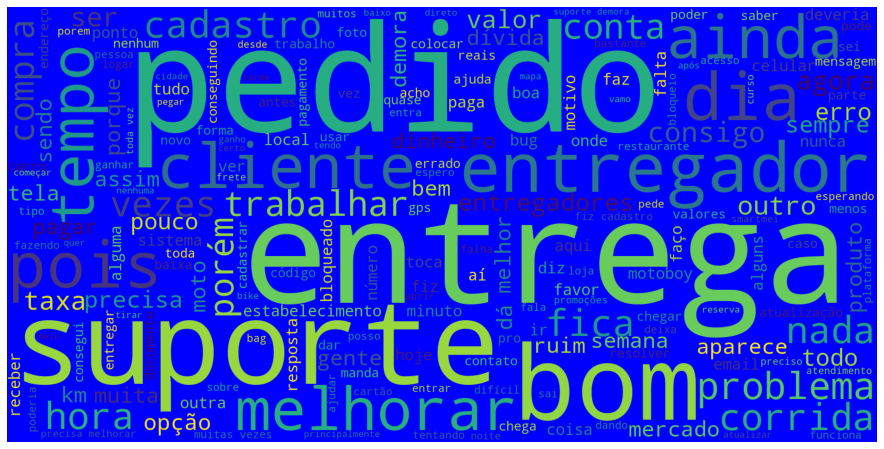

In [27]:
#Realizando o mesmo procedimento, para avaliações consideradas neutras (Nota = 3)
Neutral = Rappi[Rappi.score == 3]
Neu_Content = Neutral['content']
all_neu_content = "".join(c for c in Neu_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='blue', width=1600,                            
                      height=800).generate(all_neu_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

Idem para as neutras

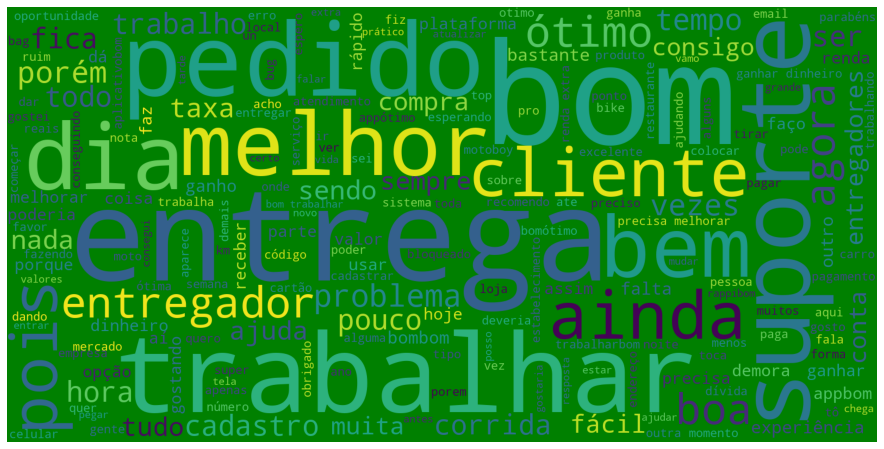

In [28]:
#Finalmente, realizando o procedimento para notas chamadas Positivas, (4 e 5)
Positive = Rappi[Rappi.score > 3]
Pos_Content = Positive['content']
all_pos_content = "".join(c for c in Pos_Content)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='green', width=1600,                            
                      height=800).generate(all_pos_content)


fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud, interpolation='bilinear')       
ax.set_axis_off()
plt.imshow(wordcloud)

E agora as positivas

## Machine Learning: Pré processamento.

A proposta aqui é começarmos com um primeiro modelo. Esse modelo vai usar apenas duas colunas: content (o texto que o usuário escreveu) e score (a nota de 1 a 5 que está na Google Play).

In [29]:
# Vetorização (Converter texto e números).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                
data_features = vectorizer.fit_transform(Rappi['content'])

data_features = data_features.toarray()

In [30]:
labels = Rappi['score'].values

## Split

O Split é assim: Vamos separar as 49 mil observações em train e test set.

- O *train set* é onde o algoritmo vai rodar e procurar os padrões. Vou usar 70% dos dados para isso.
- O *test set* é onde, a partir dos resultados eu comparo o que o algoritmo "chutou" versus o que aconteceu.

In [31]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

## Modelos de Machine Learning - Random Forest e Logistic Regression

### **Random Forest**

O Random Forest é um algoritmo que usa diversas árvores de decisão limitadas a uma pequena porção do train set. Ele basicamente pega um pedaço aleatório do train set e avalia. Com esses múltiplos pedaços, ele chega numa resposta balanceada dos parâmetros.

Com isso, ele cria uma série de preditores fracos para chegar num preditor forte.

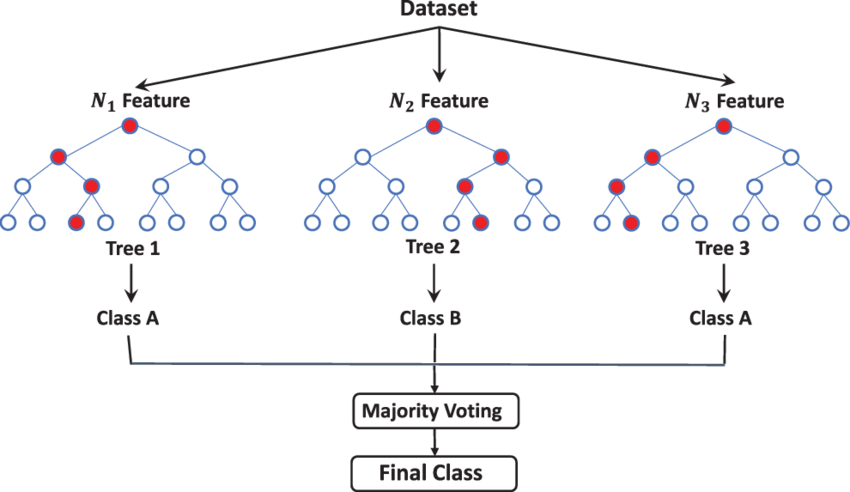

In [32]:
# Usando Random Forest para classificar os reviews.
# Também calculando o Score Cross Validated.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)

print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7342929359061348


0.7342 é o Precision Score após Validação. A validação é um instrumento para prevenir overfitting que é tornar um modelo tão preciso em si mesmo que ele prevê apenas ele mesmo.

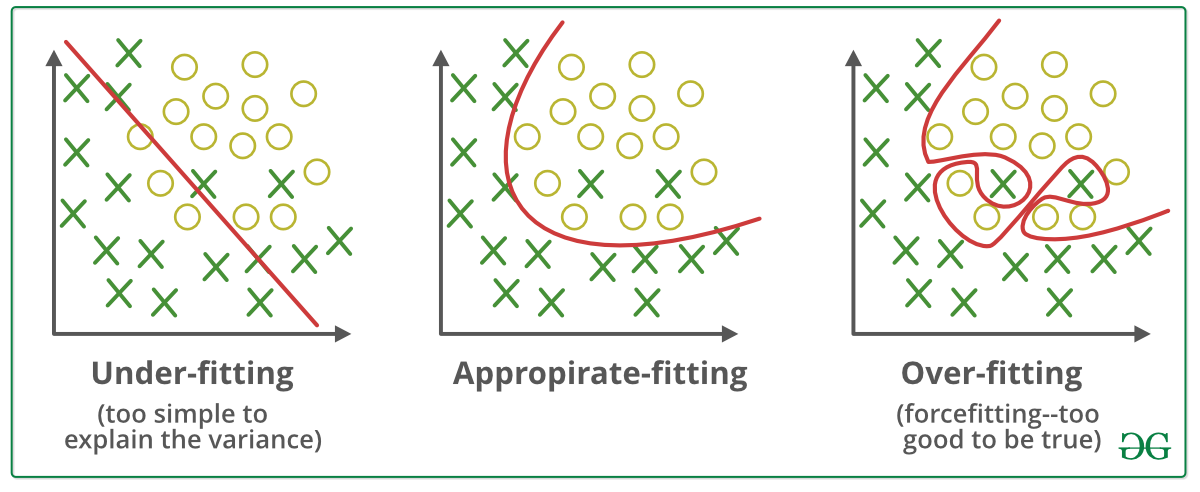

Isso quer dizer que o modelo acertou **73,42%** das classificações

Vamos ver isso em Detalhe com a Confusion Matrix.

[[ 4067    82   113    55   556]
 [  614    23    52    26   152]
 [  613    29    94    72   366]
 [  290    19    84    69   837]
 [  613    31    96   159 10525]]


Text(0.5, 1.0, 'Confusion Matrix para Modelo Random Forest')

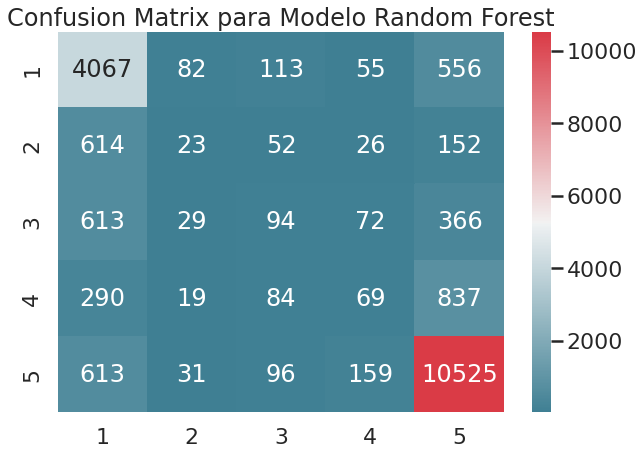

In [33]:
result = forest.predict(X_test)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set("poster")
sns.set_style('whitegrid')
conf_mat = confusion_matrix(y_test, result)
cmap = sns.diverging_palette(220, 10, as_cmap = True)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))

sns.heatmap(df_cm,cmap=cmap, annot=True, fmt='g').set_title('Confusion Matrix para Modelo Random Forest')

Leitura da Matriz de Confusão:
- No eixo x, de 1 a 5, são as avaliações observadas no test set.
- No eixo y, de 1 a 5 são as previsões que o modelo fez.

Logo, se você olhar na matriz a posição 1;1, significa quantas vezes o modelo previu o número 1 corretamente. em 1;2, quantas avaliações ele classificou como 2 e era 1. E assim por diante.

Daqui percebemos que o modelo é bem bom para prever nota 1 e nota 5. Para prever as intermediárias, não muito.

### **Logistic Regression**

In [34]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter = 10000)
LogReg = LogReg.fit(X_train, y_train)
print(LogReg)
print(np.mean(cross_val_score(LogReg, data_features, labels, cv=10)))

LogisticRegression(max_iter=10000)
0.7472010899185105


Vejamos a Confusion Matrix:

[[ 3937    80   140    45   671]
 [  562    35    58    32   180]
 [  510    29    92    82   461]
 [  199    11    57    84   948]
 [  384    21    75    85 10859]]


Text(0.5, 1.0, 'Confusion Matrix para Modelo Logistic Regression')

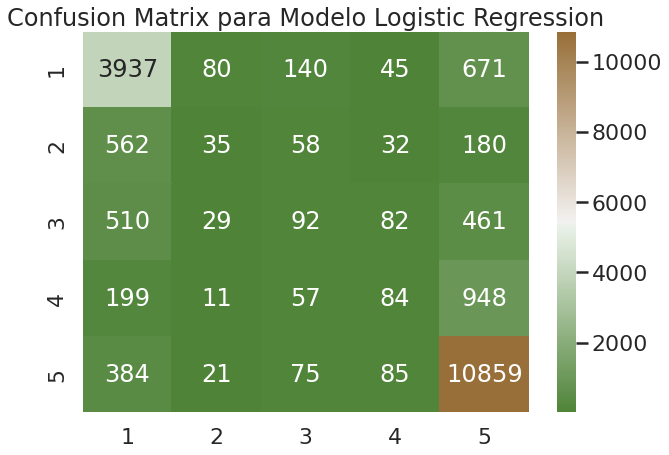

In [35]:
result_logreg = LogReg.predict(X_test)
conf_mat = confusion_matrix(y_test, result_logreg)

cmap = sns.diverging_palette(120, 50, as_cmap = True)
print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "12345"],
                  columns = [i for i in "12345"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm,cmap=cmap, annot=True, fmt='g').set_title('Confusion Matrix para Modelo Logistic Regression')

Interessante, a LogReg conseguiu prever melhor as notas 5 que o Random Forest, mas errou mais as notas 1.

# PARTE 03

## Adicionando mais variáveis ao modelo simples (Comentário -> Nota)

In [36]:
X = Rappi['content']
y = Rappi['score']
#Fazendo um novo split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
random_state = 42)

In [37]:
cvec = CountVectorizer(max_features = 1000).fit(X_train)
#Vamos chamar o primeiro train set de df_train
df_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())
df_test = pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())
print(df_train.shape)
print(y_train.shape)
print(df_test.shape)
print(y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(45818, 1000)
(45818,)
(19637, 1000)
(19637,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Inserindo a versão do app (afinal, com a evolução do app pode ser que a nota suba)

In [38]:
X = Rappi['reviewCreatedVersion'].apply(str)
y = Rappi['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
cvec = CountVectorizer(max_features = 1000).fit(X_train)

Version_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())
Version_test = pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Inserindo os "likes" dos comentários

In [39]:
X = Rappi['thumbsUpCount'].apply(str)
y = Rappi['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
cvec = CountVectorizer(max_features = 1000).fit(X_train)

Thumbs_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())
Thumbs_test = pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Inserindo a coluna de Sentimentos (Neutro, Positivo, Negativo) que calculamos após rodar o SentiLex na parte 1

In [40]:
X = Rappi['Sent'].apply(str)
y = Rappi['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
cvec = CountVectorizer(max_features = 1000).fit(X_train)

Sent_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())
Sent_test = pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Inserindo a Data de Review

In [41]:
X = Rappi['at'].apply(str)
y = Rappi['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

cvec = CountVectorizer(max_features = 1000).fit(X_train)
at_train = pd.DataFrame(cvec.transform(X_train).todense(), columns = cvec.get_feature_names())
at_test = pd.DataFrame(cvec.transform(X_test).todense(), columns=cvec.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Então agora nosso modelo ficou:

O que queremos prever: Nota do App

A partir de: Comentários, Data de Review, Sentimento do Comentário, Versão do App, Likes no Comentário.

Vamos concatenar o set e uma única matriz para realizar a análise.

Vamos concatenar os train sets e test sets que criamos para gerar um novo set

In [42]:
train = pd.concat ([df_train, Sent_train, Thumbs_train, Version_train, at_train], axis = 1)
test = pd.concat([df_test, Sent_test, Thumbs_test, Version_test, at_test], axis = 1)
print(train.shape)
print(test.shape)
print(y_train.shape)
print(y_test.shape)

(45818, 1314)
(19637, 1314)
(45818,)
(19637,)


## Voltando aos modelos

Vamos usar os mesmos modelos, Random Forest e Logistic Regression para podermos comparar os resultados anteriores.

In [43]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(train, y_train)
print(forest)
print(np.mean(cross_val_score(forest,test, y_test, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7529655552362287


**75.29%** versus **73,42%** que chegamos na parte 2, usando apenas texto

Agora, vamos verificar na Logistic Regression

In [44]:
LogReg = LogisticRegression(max_iter = 10000)
LogReg = LogReg.fit(train, y_train)
print(LogReg)
print(np.mean(cross_val_score(LogReg, test, y_test, cv=10)))

LogisticRegression(max_iter=10000)
0.7506238632626191


**75,06%** versus **74,72%** na parte 2

Ou seja, as variáveis adicionadas melhoraram **somente 1% da previsão**.

⚡ **VERIFICAR ESTES NÚMEROS** ⚡

No nosso caso, ainda que trabalhoso, ainda aumentamos a precisão de ambos os modelos, e ficou assim:

- Primeiro Lugar: LogReg com todas as Features: **73.02%**
- Segundo Lugar: Random Forest com todas as Features: **72,85%**
- Terceiro Lugar: LogReg apenas com a feature Comentário da Nota: **72,79%**
- Quarto Lugar: Random Forest apenas com a feature Comentário da Nota: **71,62%**